In [1]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Result Database

In this example we show how to read and evaluate the result database.

In [3]:
df = pd.read_csv("../data/results.csv.gz")
df.loc[:,'sw_p_m'] = df.loc[:,'nr_of_switches'] / (df.loc[:,'video_lengh'] / 60)

We only look at one specific video for one goodput pattern for now:

In [4]:
df = df[(df.video_id == "CRZbG73SX3s") & (df.pattern_type=="medium")]

## Buffer Level Example

Next we plot the average and maximum buffer level for alpha from 0 to 1:

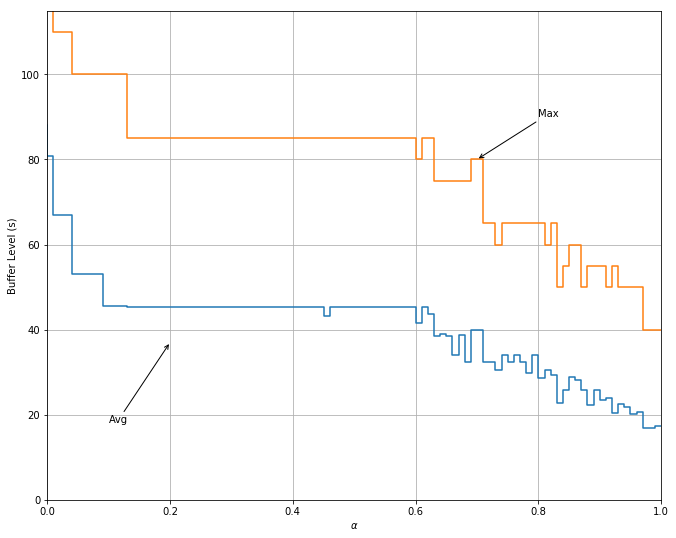

In [5]:
f = plt.figure(figsize=(11, 9))
ax1 = f.add_subplot(111)

ax1.grid()
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel("Buffer Level (s)")

ax1.set_ylim([0, 115])
ax1.set_xlim([0, 1])

segment_duration = 5

bl_median = df[['alpha','avg_buffer_level']].groupby(by='alpha').median() * segment_duration
bl_max_median = df[['alpha','max_buffer_level']].groupby(by='alpha').median() * segment_duration

ax1.step(bl_median.index, bl_median.avg_buffer_level)
ax1.step(bl_max_median.index, bl_max_median.max_buffer_level)

plt.annotate(s='Max', xy=(0.7,80), xytext=(0.8,90), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='Avg', xy=(0.2,37), xytext=(0.1,18), arrowprops=dict(arrowstyle='->'))

## Quality vs. Switches

Next we plot the average quality versus the switching frequency for alpha from 0 to 1:

(-0.02, 1.05)

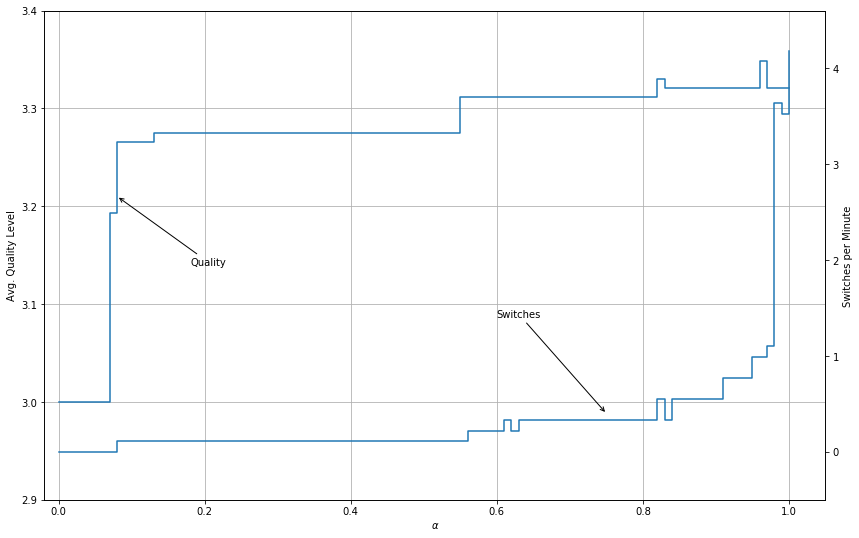

In [6]:
f = plt.figure(figsize=(14, 9))
ax1 = f.add_subplot(111)

ax1.grid()
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel("Avg. Quality Level")

# Average  Quality
ax1.set_ylim([2.9, 3.4])

bl_median = df[['alpha','avg_quality']].groupby(by='alpha').median()

ax1.step(bl_median.index, bl_median.avg_quality)

plt.annotate(s='Quality', xy=(0.08,3.21), xytext=(0.18,3.14), arrowprops=dict(arrowstyle='->'))

ax2 = ax1.twinx()

# Number of switches per minute
ax2.set_ylim([-0.5, 4.6])

ax2.set_ylabel("Switches per Minute")

sw_mean = df[['alpha','sw_p_m']].groupby(by='alpha').median()

ax2.step(sw_mean.index, sw_mean.sw_p_m, where="post")

plt.annotate(s='Switches', xy=(0.75,0.4), xytext=(0.6,1.4), arrowprops=dict(arrowstyle='->'))

ax2.set_xlim([-0.02, 1.05])